### This is where we are going to conduct our exploratory analysis

In [270]:
import re
import string
import gensim
from gensim import corpora
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
import plotly.graph_objects as go
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN


# Load NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/katherineharvey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/katherineharvey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/katherineharvey/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### HODP Template

In [271]:
# colors
monochrome_colors = ['#251616', '#760000', '#C63F3F', '#E28073', '#F1D3CF']
primary_colors = ['#C63F3F', '#F4B436', '#83BFCC', '#455574', '#E2DDDB']

In [272]:
# template
theme_hodp = go.layout.Template(
    layout=go.Layout(
        title = {'font':{'size':24, 'family':"Helvetica", 'color':monochrome_colors[0]}, 'pad':{'t':100, 'r':0, 'b':0, 'l':0}},
        font = {'size':18, 'family':'Helvetica', 'color':'#717171'},
        xaxis = {'ticks': "outside",
                'tickfont': {'size': 14, 'family':"Helvetica"},
                'showticksuffix': 'all',
                'showtickprefix': 'last',
                'showline': True,
                'title':{'font':{'size':18, 'family':'Helvetica'}, 'standoff':20},
                'automargin': True
                },
        yaxis = {'ticks': "outside",
                'tickfont': {'size': 14, 'family':"Helvetica"},
                'showticksuffix': 'all',
                'showtickprefix': 'last',
                'title':{'font':{'size':18, 'family':'Helvetica'}, 'standoff':20},
                'showline': True,
                'automargin': True
                },
        legend = {'bgcolor':'rgba(0,0,0,0)', 
                'title':{'font':{'size':18, 'family':"Helvetica", 'color':monochrome_colors[0]}}, 
                'font':{'size':14, 'family':"Helvetica"}, 
                'yanchor':'bottom'
                },
        colorscale = {'diverging':monochrome_colors},
        coloraxis = {'autocolorscale':True, 
                'cauto':True, 
                'colorbar':{'tickfont':{'size':14,'family':'Helvetica'}, 'title':{'font':{'size':18, 'family':'Helvetica'}}},
                }
    )
)

### Scrape Boba Review?

### Version one of data

### Kung Fu Tea

In [273]:
kungfu_df = pd.read_csv('kungfu3.csv')
kungfu_df = kungfu_df.drop(columns=['NBa7we src', 'RfnDt', 'nM6d2c', 'DZSIDd','znYl0', 'wiI7pd 2', 'Hzvxle', 'pkWtMe', 'dSlJg', 'dSlJg 2', 'znYl0 2'])
kungfu_df = kungfu_df.rename(columns={'d4r55': 'Name', 'rsqaWe': 'Post Time', 'wiI7pd': 'Review'})
kungfu_df['Rating'] = [1, 1, 5, 1, 1, 2, 5, 1, 5 ,1, 1, 2, 5, 5, 2, 5, 4, 5, 1, 5, 5, 5, 1, 5, 5, 5 ,2, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 2, 5, 3, 4, 4, 5, 5, 5, 1, 5, 1]

In [274]:
kungfu_df

,Name,Post Time,Review,Rating
0,Narvy Pao,9 months ago,"Literally the worst customer service, we were standing their patiently waiting for our turn as the worker makes drinks and as soon as it’s our turn, the only greeting he gave us was “so are you gonna order” with so much attitude. Disgusting behavior",1
1,Yixuan Chen,7 months ago,Please stay away from this kung fu milk tea.\nThey have the worst service always putting on a poker face and the milk tea they serve is too sweat that any tea flavor in it is nowhere to be found,1
2,Andrew Muttiah,3 years ago,Great location with amazing staff and great food and drinks. Quick service and a wide variety to choose from. Staff are friendly. Bubble tea is delicious and a nice piece of fried chicken or a chicken sandwich to go with the meal is amazing. It is located inside the 88 supermarket. There is free parking right outside the market.,5
3,Selina Wang,4 years ago,"Everytime I’ve been to this Kung Fu Tea, I’ve always had my order done incorrectly. Even when I ask for them to fix it, they don’t give me the right drink. Every single time I ask for no bubbles and add aloe, and I always get bubbles and …",1
4,Longfei Wang,4 years ago,"I ordered 2 cups of milk tea and a fries online. They didn’t have the fries, instead of calling me they raised the prices of the milk teas to make up for the original total price!! I don’t care about a fries but you should be honest to your customers and care about business integrity.",1
5,Milo Song-Weiss,4 years ago,In all the drinks we ordered some of the tapioca pearls were hard. Other locations have juicy and succulent pearls. Service here was below par among the other king fu tea I’ve visited.,2
6,Rosma Mendi,a year ago,"Our teas were good and the order was fine. I liked the tea. The place were is at not so much, it feels dirty although the restaurant were good.",5
7,Johnathan Gabriels,11 months ago,The drink's seal was broken when I recieved it. When I brought it to my car it spilled all over me and made my car sticky!,1
8,Yemi,a year ago,The bubbles in this location is delicious. Also tried the Taro Slush for the first time and as someone who usually hates Taro that ISH WAS POPPING,5
9,Eelie T,a year ago,Yuck - worst bubble tea I’ve ever had!! Taro tastes nothing like it should. What a waste of money 😡 …,1


### Gong Cha

In [275]:
gongcha_df = pd.read_csv('gongcha.csv')

In [276]:
gongcha_df = gongcha_df.rename(columns={'d4r55': 'Name', 'rsqaWe': 'Post Time', 'wiI7pd': 'Review'})

In [277]:
gongcha_df = gongcha_df.drop(columns=['NBa7we src', 'eaLgGf', 'hCCjke'])

In [278]:
gongcha_df.dropna(subset=['Name'], inplace=True)

In [279]:
gongcha_df['Rating'] = [3, 5, 5, 5, 4, 1, 5, 5, 5, 1, 5, 5, 5, 5, 2, 5, 1, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 3, 1, 5, 5, 3, 5, 5, 5, 5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5]

In [280]:
gongcha_df

,Name,Post Time,Review,Rating
0,Charlie Te,6 months ago,A decent place to get some boba milk tea. We had the Earl Grey Milk Tea with 3Js. There wasn't anything really special or a drink that stood out to me. The service was friendly and quick as we were the only ones there.,3
1,Adati Tarfa,a year ago,My favorite Gong Cha! The staff are awesome. My drink was made to perfection. It looks like a lot of people love the location. There was also cool illustrations in the store. It was definitely an exciting place to visit and enjoy tea.,5
2,Amy Hoang,4 weeks ago,We had the pleasure of visiting Harvard Square and happened upon this lovely tea shop. Our teas were refreshing and just what we needed after a long day of site seeing. Service was friendly and tea was made promptly. Highly recommend!!,5
3,Michael Tam,a month ago,"Gong Cha is my favorite brand for authentic milk tea. This shop was clean, nice, and quick to complete my order. We ordered 7 drinks and all were made well. I also love those egg waffles, HK classic. Strongly recommend the Matcha Strawberry latte with some original egg waffles.",5
4,Alex C,a year ago,"There are better Boba spots in the greater Boston area, but if you're near Harvard, this is a good spot to hit. Nice, but smaller, seating area to relax at or take your drink on a lively stroll through the area.",4
5,Becka Simon,a month ago,"Absolute trash. I am allergic to lactose and asked for a drink without milk. However, I was still served a drink with milk. After confirming it was milk in my drink, the person refused to remake the drink unless I bought another one and was …",1
6,Khoi Nguyen,a year ago,Greatest boba shop in the world. Service is kind and instant. Teas have the perfect flavor and sweetness (and even then they’re customizable and consistent so you can find what you like). …,5
7,Alan Wong,2 months ago,Great spot for Milk Tea. My favorite is earl grey with the 3 J's. The owner Barry is super cool guy to talk to and welcoming.,5
8,Andrew Ou,9 months ago,Lovely service. Amazing selection and store is very clean. Tried the Dirty Brown Sugar Milk Tea and it tastes almost heaven-like.,5
9,Yi Li,8 months ago,"We ordered two bubble teas in the evening of Aug. 8 2023, a medium Taro and a large Pearl Milk Tea. The pearls in the Pearl Milk Tea had a texture of soggy bread and were not chewy at all. They were obviously too old, cooked too long time …",1


### Tiger Sugar

#### Clean Data

In [281]:
tiger_df = pd.read_csv('tiger.csv')
tiger_df = tiger_df.rename(columns={'d4r55': 'Name', 'rsqaWe': 'Post Time', 'wiI7pd': 'Review'})
tiger_df = tiger_df.drop(columns=['NBa7we src', 'eaLgGf', 'hCCjke', 'nM6d2c', 'DZSIDd', 'wiI7pd 2'])
tiger_df.dropna(subset=['Name'], inplace=True)
tiger_df['Rating'] = [5, 1, 5, 5, 1, 1, 3, 1, 5, 4, 5, 5, 1, 1, 2, 5, 1, 2, 4, 1, 5, 2, 1, 2, 5, 5, 5, 5, 1, 5, 1, 3, 1, 2, 1, 5, 5, 5, 3, 3, 3, 3, 1, 5, 5, 5, 5, 5, 5, 5, 5]

In [282]:
tiger_df

,Name,Post Time,Review,Rating
0,K O,a month ago,"I genuinely do not understand why there is this much dissatisfaction with this place. I dropped by on a Sunday evening, placed an order at one of the kiosks, and my drink was ready in less than 5 mins. The two ladies working behind the …",5
1,Ashish Malik,3 months ago,The service at this place ruined the food experience. It was my first time at a Tiger Suger Place and we were placing the order on the kiosk. There was a young adult behind the counter who was giving us suggestions and knew our order. Later …,1
2,RC,5 months ago,"Great place to get your boba fix, not a lot of inside seating, but if you happen to get one, it’s a good place to watch people. Lots of drink variants, I really like that they have non-dairy milk options.",5
3,Lydia Chew,a year ago,"Much preferred over some of the other boba chains in the area.\n\nI ordered one of their signature drinks, which is listed as ""black sugar boba + …",5
4,Anita Chiang,a month ago,"I made a mobile order, came to the store after receiving ready to pickup, and no one there in the store. The staff just left a note saying will be back in 15 mins. Have waited over 15 mins and no one back🙄 …",1
5,Andrew Yang,3 months ago,"Upon placing my order, I specifically requested less ice for the Strawberry Mochi. However, I was disappointed to find that not only did the drink contain a substantial amount of ice, but it was also overly filled with toppings. This …",1
6,Yellow Bluebonnet,11 months ago,"Got their strawberry milk tea. It tasted amazing!! However, I will never be back. The service was slow and awful and the employees were not polite or accommodating. No smiles or interaction beyond taking my order. The food was expensive too. It's too bad though since I lived their milk tea.",3
7,Andreu Canales,5 days ago,I visited him today at 8:17 in the afternoon I asked for four and the boy attended me in a very rude way then I wanted to ask for one more and I said sorry one more and he told me no sorry and he ignored me he left the front I would like to …,1
8,Becka Simon,a month ago,"Best boba in Harvard Square! Would reccomend.\n\nThe drinks are very tasty, staff is accommodating to changes, they always provide quick service.",5
9,Danielle G,a year ago,Good boba. I was unaware this was a chain and the titles of the drinks aren’t really descriptive so I went with their most popular drink. It was quite good and the service was fast. Very instagram-able appearance. …,4


## Analysis!!

### Sentiment

In [283]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Drop NaN values from the 'Review' column for all DataFrames
for df in [tiger_df, kungfu_df, gongcha_df]:
    df.dropna(subset=['Review'], inplace=True)

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each review for all DataFrames
for df in [tiger_df, kungfu_df, gongcha_df]:
    sentiments = []
    for review in df['Review']:
        if isinstance(review, str):  # Check if 'review' is a string
            sentiment_score = sid.polarity_scores(review)
            sentiments.append(sentiment_score)

    # Add sentiment scores to DataFrame
    df['Sentiments'] = sentiments

# Calculate and add compound sentiment score to DataFrame
for df in [tiger_df, kungfu_df, gongcha_df]:
    df['Compound Sentiment Score'] = df['Sentiments'].apply(lambda x: x['compound'])

# Add sentiment category column to DataFrame
for df in [tiger_df, kungfu_df, gongcha_df]:
    df['Sentiment Category'] = df['Compound Sentiment Score'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))


In [284]:
import plotly.graph_objects as go

# Concatenate sentiment scores from all DataFrames
all_sentiments = []
for df in [tiger_df, kungfu_df, gongcha_df]:
    all_sentiments.extend(df['Compound Sentiment Score'])

# Create a histogram of sentiment scores
fig = go.Figure()
fig.add_trace(go.Histogram(x=all_sentiments, nbinsx=20, name='Sentiment Scores'))

# Update layout
fig.update_layout(
    title='Distribution of Sentiment Scores for All DataFrames',
    xaxis_title='Sentiment Score',
    yaxis_title='Frequency',
    bargap=0.05,
)

# Show plot
fig.show()


In [285]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=('Tiger Sugar', 'Kung Fu Tea', 'Gong Cha'))

# Iterate over each DataFrame
for i, df in enumerate([tiger_df, kungfu_df, gongcha_df], start=1):
    # Concatenate sentiment scores
    all_sentiments = df['Compound Sentiment Score']

    # Create histogram for each DataFrame
    fig.add_trace(go.Histogram(x=all_sentiments, nbinsx=20, name='Sentiment Scores'), row=1, col=i)

# Update layout
fig.update_layout(
    title='Distribution of Sentiment Scores for All DataFrames',
    xaxis_title='Sentiment Score',
    yaxis_title='Frequency',
    bargap=0.05,
)

# Show plot
fig.show()


In [289]:
import plotly.graph_objects as go

# Function to count sentiment categories
def count_sentiment_categories(df):
    positive_count = (df['Sentiment Category'] == 'Positive').sum()
    negative_count = (df['Sentiment Category'] == 'Negative').sum()
    neutral_count = (df['Sentiment Category'] == 'Neutral').sum()
    total_reviews = len(df)
    return positive_count / total_reviews, negative_count / total_reviews, neutral_count / total_reviews

# Create traces for each sentiment category
sentiment_categories = ['Positive', 'Negative', 'Neutral']
bar_colors = primary_colors[:3]  # Blue for positive, orange for negative, green for neutral
df_names = ['Tiger Sugar', 'Kung Fu Tea', 'Gong Cha']


# Initialize data list to store traces
data = []

# Iterate over each DataFrame
for df, color, name in zip([tiger_df, kungfu_df, gongcha_df], bar_colors, df_names):
    # Count sentiment categories
    positive_ratio, negative_ratio, neutral_ratio = count_sentiment_categories(df)

    # Create a bar trace for each sentiment category
    trace = go.Bar(x=sentiment_categories,
                   y=[positive_ratio, negative_ratio, neutral_ratio],
                   name=name,
                   marker_color=color)
    
    # Append trace to data list
    data.append(trace)

# Create layout
layout = go.Layout(title='Sentiment Categories (Normalized)',
                   xaxis_title='Sentiment Category',
                   yaxis_title='Percentage of Total Reviews',
                   barmode='group',
                   template=theme_hodp,
                   bargap=0.1)

layout['legend'] = {'y': 0} 
# Create figure
fig = go.Figure(data=data, layout=layout)
# Show plot
fig.show()


In [290]:
def convert_to_days(time_str):
    if ' ' in time_str:
        num, unit = time_str.split(maxsplit=1)  # Split only once to preserve the rest of the string

        if num == 'a':
            if 'year' in unit:
                return 365
            elif 'month' in unit:
                return 30
            elif 'week' in unit:
                return 7  
            elif 'day' in unit:
                return 1
        else:
            num = int(num)
            if 'years' in unit:
                return num * 365
            elif 'months' in unit:
                return num *30
            elif 'weeks' in unit:
                return num * 7  
            elif 'days' in unit:
                return num  

In [291]:
for df in [tiger_df, kungfu_df, gongcha_df]:
    # Apply the function to create a new column
    df['Converted Time'] = df['Post Time'].apply(convert_to_days)


In [292]:
import plotly.graph_objects as go

# Function to plot sentiment distribution over time
def plot_sentiment_over_time(df, name):
    # Filter the DataFrame to include only positive sentiment
    positive_df = df[df['Sentiment Category'] == 'Neutral']

    # Group by date and count the number of positive sentiment occurrences
    sentiment_counts = positive_df.groupby('Converted Time').size()

    # Create line trace for sentiment over time
    line = go.Scatter(
        x=sentiment_counts.index,
        y=sentiment_counts.values,
        mode='lines',
        name=name
    )

    return line

# Define DataFrames and names
df_names = ['Tiger Sugar', 'Kung Fu Tea', 'Gong Cha']
dataframes = [tiger_df, kungfu_df, gongcha_df]

data = []

# Iterate over each DataFrame
for df, name in zip(dataframes, df_names):
    # Plot sentiment distribution over time for each DataFrame
    line = plot_sentiment_over_time(df, name)
    data.append(line)

# Create layout
layout = go.Layout(
    title='Distribution of Positive Sentiment Over Time',
    xaxis_title='Time',
    yaxis_title='Number of Positive Sentiments',
    template=theme_hodp
)

# Create figure
fig = go.Figure(data=data, layout=layout)

# Show plot
fig.show()


In [293]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define a function to create line graphs for sentiment categories over time
def create_sentiment_over_time_subplot(df, title):
    # Group by 'Converted Time' and 'Sentiment Category', and count the occurrences of each sentiment category
    grouped_df = df.groupby(['Converted Time', 'Sentiment Category']).size().reset_index(name='Count')

    # Pivot the DataFrame to have 'Converted Time' as index, 'Sentiment Category' as columns, and 'Count' as values
    pivot_df = grouped_df.pivot(index='Converted Time', columns='Sentiment Category', values='Count').fillna(0)

    # Create line graph
    fig = go.Figure()

    # Add traces for each sentiment category
    for sentiment_category in ['Positive', 'Negative', 'Neutral']:
        fig.add_trace(go.Scatter(x=pivot_df.index, y=pivot_df[sentiment_category],
                            mode='lines+markers',
                            name=sentiment_category))

    # Set subplot title
    fig.update_layout(title=title)

    return fig

# Create subplots
fig = make_subplots(rows=3, cols=1, subplot_titles=('Tiger Sugar', 'Kung Fu Tea', 'Gong Cha'),
                    shared_xaxes=True, shared_yaxes=True)

# Iterate over each DataFrame and subplot title
for i, (df, title) in enumerate(zip([tiger_df, kungfu_df, gongcha_df], ['Tiger Sugar', 'Kung Fu Tea', 'Gong Cha']), start=1):
    # Create subplot for each DataFrame
    subplot_fig = create_sentiment_over_time_subplot(df, title)
    # Add subplot to main figure
    for trace in subplot_fig.data:
        fig.add_trace(trace, row=i, col=1)

# Update layout
fig.update_layout(
    title='Distribution of Sentiment Categories Over Time',
    xaxis_title='Time',
    yaxis_title='Number of Reviews',
    legend_title='Sentiment Category',
    height=1000  # Adjust height to accommodate multiple subplots
)

# Show plot
fig.show()


In [294]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define a function to create line graphs for sentiment categories over time
def create_sentiment_over_time_subplot(df, title):
    # Group by 'Converted Time' and 'Sentiment Category', and count the occurrences of each sentiment category
    grouped_df = df.groupby(['Converted Time', 'Sentiment Category']).size().reset_index(name='Count')

    # Pivot the DataFrame to have 'Converted Time' as index, 'Sentiment Category' as columns, and 'Count' as values
    pivot_df = grouped_df.pivot(index='Converted Time', columns='Sentiment Category', values='Count').fillna(0)

    # Create line graph
    fig = go.Figure()

    # Add traces for each sentiment category
    for sentiment_category in ['Positive', 'Negative', 'Neutral']:
        fig.add_trace(go.Scatter(x=pivot_df.index, y=pivot_df[sentiment_category],
                            mode='lines+markers',
                            name=sentiment_category))

    # Set subplot title
    fig.update_layout(title=title)

    return fig

# Create subplots
fig = make_subplots(rows=3, cols=1, subplot_titles=('Tiger Sugar', 'Kung Fu Tea', 'Gong Cha'),
                    shared_xaxes=True, shared_yaxes=True)

# Iterate over each DataFrame and subplot title
for i, (df, title) in enumerate(zip([tiger_df, kungfu_df, gongcha_df], ['Tiger Sugar', 'Kung Fu Tea', 'Gong Cha']), start=1):
    # Create subplot for each DataFrame
    subplot_fig = create_sentiment_over_time_subplot(df, title)
    # Add subplot to main figure
    for trace in subplot_fig.data:
        fig.add_trace(trace, row=i, col=1)

    # Limit x-axis to 500
    fig.update_xaxes(range=[0, 500], row=i, col=1)

# Update layout
fig.update_layout(
    title='Distribution of Sentiment Categories Over Time',
    xaxis_title='Time',
    yaxis_title='Number of Reviews',
    legend_title='Sentiment Category',
    height=1000  # Adjust height to accommodate multiple subplots
)

# Show plot
fig.show()


### Sentiment over specific drinks

In [298]:
import plotly.graph_objects as go

# Function to count sentiment categories
def count_sentiment_categories(df):
    positive_count = (df['Sentiment Category'] == 'Positive').sum()
    negative_count = (df['Sentiment Category'] == 'Negative').sum()
    neutral_count = (df['Sentiment Category'] == 'Neutral').sum()
    total_reviews = len(df)
    return positive_count / total_reviews, negative_count / total_reviews, neutral_count / total_reviews

# Function to filter DataFrame for reviews containing the word 'service' and plot sentiment distribution
def plot_sentiment_distribution(df, name):
    # Filter the DataFrame to include only rows where the review contains the word 'service'
    service_reviews_df = df[df['Review'].str.contains('service', case=False)]

    # Count sentiment categories
    positive_ratio, negative_ratio, neutral_ratio = count_sentiment_categories(service_reviews_df)

    # Create bar trace for each sentiment category
    bar = go.Bar(
        x=['Positive', 'Negative', 'Neutral'],
        y=[positive_ratio, negative_ratio, neutral_ratio],
        name=name,
        marker_color=df['Color'].iloc[0]  # Set color based on DataFrame
    )

    return bar

# Define DataFrames
df_names = ['Tiger Sugar', 'Kung Fu Tea', 'Gong Cha']
restaurant_colors = primary_colors[:3]
data = []

# Iterate over each DataFrame
for df, color, name in zip([tiger_df, kungfu_df, gongcha_df], restaurant_colors, df_names):
    df['Color'] = color  # Add a 'Color' column to DataFrame for marker_color
    # Plot sentiment distribution for each DataFrame
    bar = plot_sentiment_distribution(df, name)
    data.append(bar)

# Create layout
layout = go.Layout(
    title='Sentiment Categories with "Service" Reviews (Normalized)',
    xaxis_title='Sentiment Category',
    yaxis_title='Percentage of Total Reviews',
    barmode='group',
    template=theme_hodp,
    height=400,
    bargap=0.1
)

# Specify the legend position
layout['legend'] = {'y': -0.2}  # Move legend down by 20% of the plot height

# Create figure
fig = go.Figure(data=data, layout=layout)

# Show plot
fig.show()


In [299]:
import plotly.graph_objects as go

# Function to count sentiment categories
def count_sentiment_categories(df):
    positive_count = (df['Sentiment Category'] == 'Positive').sum()
    negative_count = (df['Sentiment Category'] == 'Negative').sum()
    neutral_count = (df['Sentiment Category'] == 'Neutral').sum()
    total_reviews = len(df)
    return positive_count / total_reviews, negative_count / total_reviews, neutral_count / total_reviews

# Function to filter DataFrame for reviews containing the word 'service' and plot sentiment distribution
def plot_sentiment_distribution(df, name):
    # Filter the DataFrame to include only rows where the review contains the word 'service'
    service_reviews_df = df[df['Review'].str.contains('flavor', case=False)]

    # Count sentiment categories
    positive_ratio, negative_ratio, neutral_ratio = count_sentiment_categories(service_reviews_df)

    # Create bar trace for each sentiment category
    bar = go.Bar(
        x=['Positive', 'Negative', 'Neutral'],
        y=[positive_ratio, negative_ratio, neutral_ratio],
        name=name,
        marker_color=df['Color'].iloc[0]  # Set color based on DataFrame
    )

    return bar

# Define DataFrames
df_names = ['Tiger Sugar', 'Kung Fu Tea', 'Gong Cha']
restaurant_colors = primary_colors[:3]
data = []

# Iterate over each DataFrame
for df, color, name in zip([tiger_df, kungfu_df, gongcha_df], restaurant_colors, df_names):
    df['Color'] = color  # Add a 'Color' column to DataFrame for marker_color
    # Plot sentiment distribution for each DataFrame
    bar = plot_sentiment_distribution(df, name)
    data.append(bar)

# Create layout
layout = go.Layout(
    title='Sentiment Categories with "Flavor" Reviews (Normalized)',
    xaxis_title='Sentiment Category',
    yaxis_title='Percentage of Total Reviews',
    barmode='group',
    template=theme_hodp,
    height=400,
    bargap=0.1
)

# Specify the legend position
layout['legend'] = {'y': -0.2}  # Move legend down by 20% of the plot height

# Create figure
fig = go.Figure(data=data, layout=layout)

# Show plot
fig.show()


/var/folders/zl/vrkthn715j97ns3mht1gpfm80000gn/T/ipykernel_79545/743948831.py:9: RuntimeWarning:

invalid value encountered in scalar divide



In [320]:
import plotly.graph_objects as go

# Function to count sentiment categories
def count_sentiment_categories(df):
    positive_count = (df['Sentiment Category'] == 'Positive').sum()
    negative_count = (df['Sentiment Category'] == 'Negative').sum()
    neutral_count = (df['Sentiment Category'] == 'Neutral').sum()
    total_reviews = len(df)
    return positive_count / total_reviews, negative_count / total_reviews, neutral_count / total_reviews

# Function to filter DataFrame for reviews containing the word 'service' and plot sentiment distribution
def plot_sentiment_distribution(df, name):
    # Filter the DataFrame to include only rows where the review contains the word 'service'
    service_reviews_df = df[df['Review'].str.contains('staff', case=False)]

    # Count sentiment categories
    positive_ratio, negative_ratio, neutral_ratio = count_sentiment_categories(service_reviews_df)

    # Create bar trace for each sentiment category
    bar = go.Bar(
        x=['Positive', 'Negative', 'Neutral'],
        y=[positive_ratio, negative_ratio, neutral_ratio],
        name=name,
        marker_color=df['Color'].iloc[0]  # Set color based on DataFrame
    )

    return bar

# Define DataFrames
df_names = ['Tiger Sugar', 'Kung Fu Tea', 'Gong Cha']
restaurant_colors = primary_colors[:3]
data = []

# Iterate over each DataFrame
for df, color, name in zip([tiger_df, kungfu_df, gongcha_df], restaurant_colors, df_names):
    df['Color'] = color  # Add a 'Color' column to DataFrame for marker_color
    # Plot sentiment distribution for each DataFrame
    bar = plot_sentiment_distribution(df, name)
    data.append(bar)

# Create layout
layout = go.Layout(
    title='Sentiment Categories with "Staff" Reviews (Normalized)',
    xaxis_title='Sentiment Category',
    yaxis_title='Percentage of Total Reviews',
    barmode='group',
    template=theme_hodp,
    height=400,
    width=700,
    bargap=0.1
)

# Specify the legend position
layout['legend'] = {'y': -0.2}  # Move legend down by 20% of the plot height

# Create figure
fig = go.Figure(data=data, layout=layout)

# Show plot
fig.show()


In [319]:
import plotly.graph_objects as go

# Function to plot rating distribution
def plot_rating_distribution(df, name):
    # Filter the DataFrame to include only rows with non-null ratings

    # Count the occurrences of each rating
    rating_counts = df['Rating'].value_counts(normalize=True).sort_index()

    # Create bar trace for each rating
    bar = go.Bar(
        x=rating_counts.index,
        y=rating_counts.values,
        name=name,
        marker_color=df['Color'].iloc[0]  # Set color based on DataFrame
    )

    return bar

# Define DataFrames
df_names = ['Tiger Sugar', 'Kung Fu Tea', 'Gong Cha']
restaurant_colors = primary_colors[:3]
data = []

# Iterate over each DataFrame
for df, color, name in zip([tiger_df, kungfu_df, gongcha_df], restaurant_colors, df_names):
    df['Color'] = color  # Add a 'Color' column to DataFrame for marker_color
    # Plot rating distribution for each DataFrame
    bar = plot_rating_distribution(df, name)
    data.append(bar)

# Create layout
layout = go.Layout(
    title='Rating Distribution',
    xaxis_title='Rating',
    yaxis_title='Percentage of Total Reviews',
    template=theme_hodp,
    height=400,
    width=700,
    bargap=0.1
)

# Specify the legend position
layout['legend'] = {'y': -0.2}  # Move legend down by 20% of the plot height

# Create figure
fig = go.Figure(data=data, layout=layout)

# Show plot
fig.show()


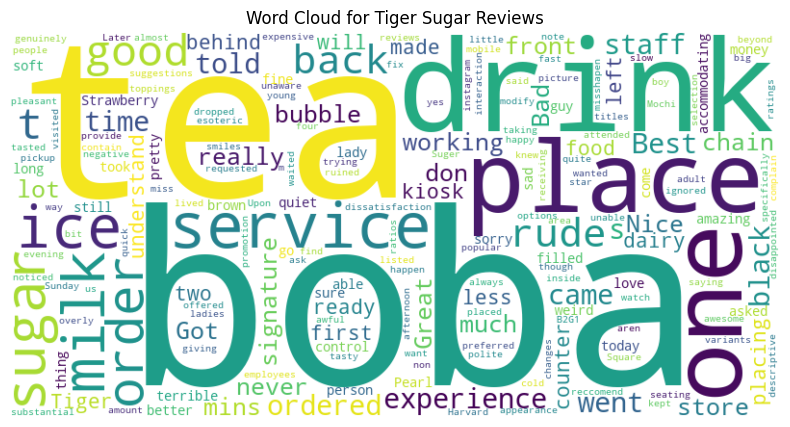

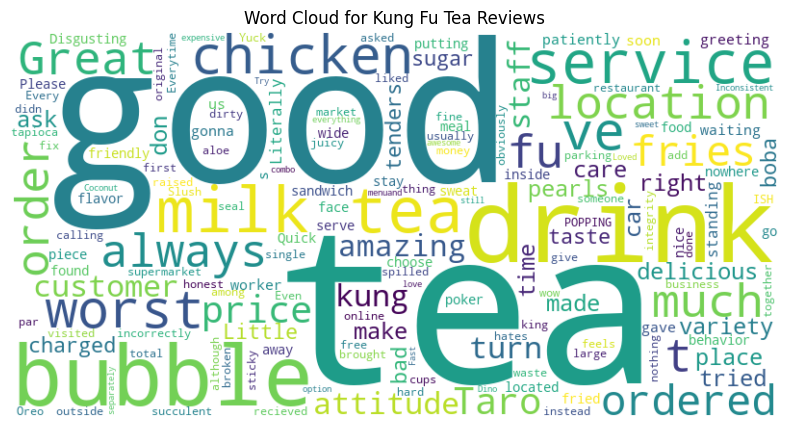

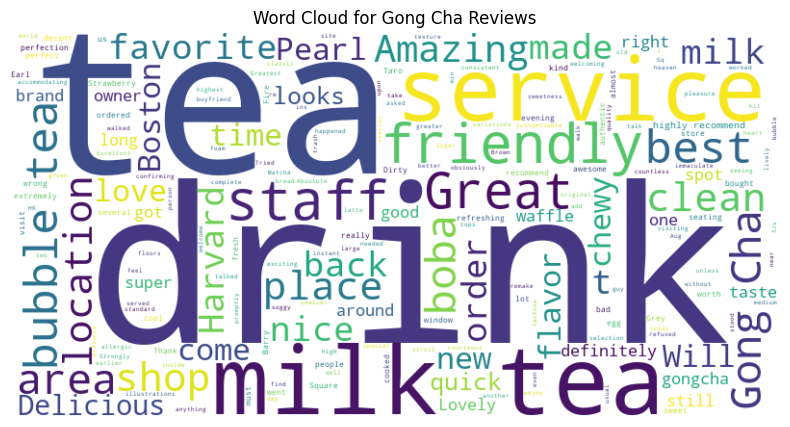

In [304]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud and display it
def generate_word_cloud(df, title):
    # Combine all reviews into a single string
    text = ' '.join(df['Review'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {title} Reviews')
    plt.show()

# Generate word cloud for each DataFrame
generate_word_cloud(tiger_df, 'Tiger Sugar')
generate_word_cloud(kungfu_df, 'Kung Fu Tea')
generate_word_cloud(gongcha_df, 'Gong Cha')


In [308]:
pd.set_option('display.max_colwidth', None)

### Sentiment Analysis

### Reviews Over Time

In [ ]:
x_values = []
for time in df['Post Time']:
    x_values.append(convert_to_days(time))

# Create a histogram using Plotly
fig = go.Figure(data=[go.Histogram(x=x_values, marker=dict(color=primary_colors))])

# Update layout to add title and axis labels
fig.update_layout(title='Frequency of reviews over time',
                  xaxis_title='Days Ago',
                  yaxis_title='Frequency', 
                  template=theme_hodp)

# Show the plot
fig.show()

In [ ]:
import plotly.graph_objects as go

# Assuming x_values is your list of converted time values
x_values_tiger = []
for time in tiger_df['Post Time']:
    x_values_tiger.append(convert_to_days(time))

x_values_kungfu = []
for time in kungfu_df['Post Time']:
    x_values_kungfu.append(convert_to_days(time))

x_values_gongcha = []
for time in gongcha_df['Post Time']:
    x_values_gongcha.append(convert_to_days(time))

# Calculate the number of reviews at each point in time for each DataFrame
review_count_tiger = [x_values_tiger.count(day) for day in set(x_values_tiger)]
review_count_kungfu = [x_values_kungfu.count(day) for day in set(x_values_kungfu)]
review_count_gongcha = [x_values_gongcha.count(day) for day in set(x_values_gongcha)]

# Create traces for each DataFrame
trace_tiger = go.Scatter(x=sorted(set(x_values_tiger)), y=review_count_tiger, mode='lines', name='Tiger Sugar', line_color=primary_colors[0])
trace_kungfu = go.Scatter(x=sorted(set(x_values_kungfu)), y=review_count_kungfu, mode='lines', name='Kung Fu Tea', line_color=primary_colors[1])
trace_gongcha = go.Scatter(x=sorted(set(x_values_gongcha)), y=review_count_gongcha, mode='lines', name='Gong Cha', line_color=primary_colors[2])

# Create a line plot using Plotly
fig = go.Figure(data=[trace_tiger, trace_kungfu, trace_gongcha])

# Update layout to add title and axis labels
fig.update_layout(
    title='Number of Reviews Over Time',
    xaxis_title='Days Ago',
    yaxis_title='Number of Reviews',
    xaxis_range=[0, 500],  # Limit x-axis to last 500 days
    template=theme_hodp, 
    width=700,  # Set width to 800 pixels
    height=400, 

)

layout['legend'] = {'y': -0.2} 

# Show the plot
fig.show()


In [312]:
# Preprocess the text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if isinstance(text, str):  # Check if the text is already a string
        tokens = word_tokenize(text.lower())
        tokens = [token for token in tokens if token.isalpha()]  # Remove non-alphabetic tokens
        tokens = [token for token in tokens if token not in stop_words]  # Remove stopwords
        tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize tokens
        return tokens
    else:
        return []  # Return an empty list for non-string values

# Apply preprocessing to the caption column
df['processed_review'] = df['Review'].apply(preprocess_text)

# Create a dictionary and corpus
dictionary = corpora.Dictionary(df['processed_review'])
corpus = [dictionary.doc2bow(text) for text in df['processed_review']]

# Train LDA model
num_topics = 5 
lda_model = gensim.models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=2, workers=2)

# Print the topics and associated words
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}')

# To get topic distribution for a specific caption
# doc = dictionary.doc2bow(preprocess_text("Your caption text here"))
# topic_distribution = lda_model[doc]

Topic: 0 
Words: 0.030*"back" + 0.029*"staff" + 0.019*"tea" + 0.017*"order" + 0.016*"service" + 0.016*"friendly" + 0.016*"fire" + 0.016*"drink" + 0.015*"gong" + 0.015*"definitely"
Topic: 1 
Words: 0.029*"tea" + 0.025*"clean" + 0.020*"drink" + 0.019*"staff" + 0.019*"great" + 0.019*"would" + 0.019*"recommend" + 0.016*"brand" + 0.016*"cha" + 0.015*"gong"
Topic: 2 
Words: 0.072*"tea" + 0.036*"milk" + 0.026*"bubble" + 0.019*"get" + 0.019*"best" + 0.018*"friendly" + 0.018*"service" + 0.015*"pearl" + 0.013*"shop" + 0.010*"harvard"
Topic: 3 
Words: 0.044*"tea" + 0.043*"milk" + 0.038*"drink" + 0.023*"boba" + 0.019*"area" + 0.014*"great" + 0.014*"amazing" + 0.012*"friendly" + 0.010*"spot" + 0.010*"boston"
Topic: 4 
Words: 0.029*"best" + 0.024*"location" + 0.024*"great" + 0.024*"tea" + 0.024*"service" + 0.017*"drink" + 0.017*"perfect" + 0.016*"shop" + 0.016*"flavor" + 0.015*"time"


In [331]:
lda_model.show_topic(4)

[('best', 0.029428678),
 ('location', 0.024149371),
 ('great', 0.024123114),
 ('tea', 0.024074376),
 ('service', 0.024004176),
 ('drink', 0.01682136),
 ('perfect', 0.016522087),
 ('shop', 0.016490731),
 ('flavor', 0.016478246),
 ('time', 0.014708473)]

In [334]:
import plotly.graph_objects as go

# Extract the topic-term matrix from the LDA model
topic_term_matrix = lda_model.get_topics()

# Get the list of terms
terms = [dictionary[idx] for idx in range(len(dictionary))]

# Create a heatmap figure
fig = go.Figure(data=go.Heatmap(
    z=topic_term_matrix,
    x=terms,  # Terms on x-axis
    y=[f"Topic {i}" for i in range(num_topics)],  # Topics on y-axis
    colorscale='Viridis',  # Choose your preferred colorscale
))

# Customize layout
fig.update_layout(
    title="LDA Topic-Term Matrix",
    xaxis_title="Terms",
    yaxis_title="Topics",
)

# Show the plot
fig.show()


In [341]:
import plotly.express as px

# Get the top N words for each topic
top_n = 5
top_words_per_topic = []
for i in range(num_topics):
    top_words = [dictionary[idx] for idx in np.argsort(topic_tfidf_scores_normalized[i])[::-1][:top_n]]
    top_words_per_topic.append(top_words)

# Create a DataFrame for the top N words
top_n_words_df = pd.DataFrame(top_words_per_topic, columns=[f"Word {i+1}" for i in range(top_n)])

# Set up a bar plot for each topic
fig = go.Figure()
for i in range(num_topics):
    fig.add_trace(go.Bar(
        x=top_n_words_df.columns,
        y=topic_tfidf_scores_normalized[i, np.argsort(topic_tfidf_scores_normalized[i])[::-1][:top_n]],
        name=f"Topic {i}",
        marker_color=primary_colors[i]
    ))

# Customize layout
fig.update_layout(
    barmode='group',
    title=f"Top {top_n} TF-IDF Scores of Terms in Topics",
    xaxis_title="Terms",
    yaxis_title="TF-IDF Score",
    template=theme_hodp
)

# Show the plot
fig.show()


AttributeError: 'LdaMulticore' object has no attribute 'components'

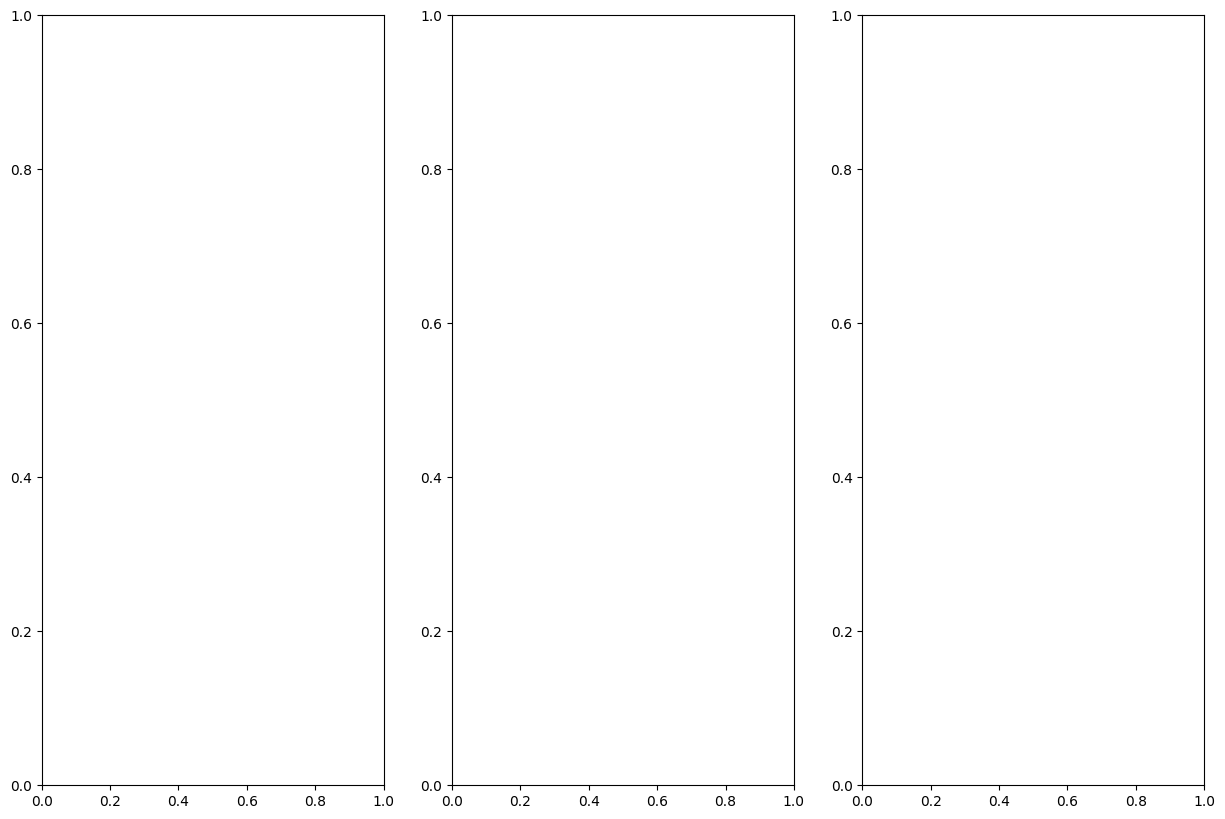

In [324]:
import matplotlib.pyplot as plt

# Define the number of rows and columns for subplots
num_rows = 1 # You can adjust the number of rows and columns as needed
num_cols = 3

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Extract word weights for each topic
for idx, topic in enumerate(lda_model.components_):
    row_idx = idx // num_cols
    col_idx = idx % num_cols

    word_weights = {dictionary[word_id]: weight for word_id, weight in enumerate(topic) if word_id in dictionary}
    sorted_words = sorted(word_weights.items(), key=lambda x: x[1], reverse=True)[:10]  # Get the top 10 words for each topic

    axs[row_idx, col_idx].barh([word[0] for word in sorted_words], [word[1] for word in sorted_words])
    axs[row_idx, col_idx].set_xlabel('Word Weights')
    axs[row_idx, col_idx].set_ylabel('Words')
    axs[row_idx, col_idx].set_title(f'Top Words for Topic {idx}')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:

# Create a dictionary and corpus
dictionary = corpora.Dictionary(df['processed_review'])
corpus = [dictionary.doc2bow(text) for text in df['processed_review']]

# Train LDA model
num_topics = 10  # Adjust the number of topics as needed
lda_model = gensim.models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=2, workers=2)

# Assign each review to a cluster based on the dominant topic
def get_dominant_topic(lda_model, bow):
    topic_distribution = lda_model[bow]
    dominant_topic = max(topic_distribution, key=lambda x: x[1])[0]
    return dominant_topic

df['cluster'] = [get_dominant_topic(lda_model, bow) for bow in corpus]

# Print the assigned clusters for each review
print(df[['Review', 'cluster']])

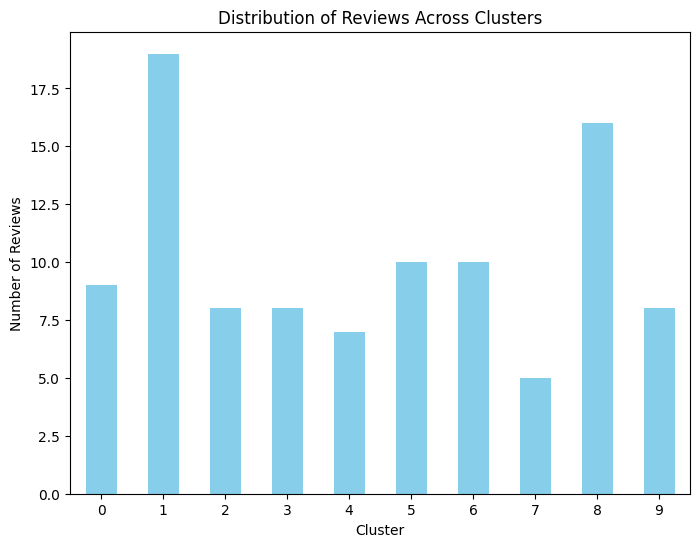

In [ ]:
plt.figure(figsize=(8, 6))
df['cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews Across Clusters')
plt.xticks(rotation=0)
plt.show()

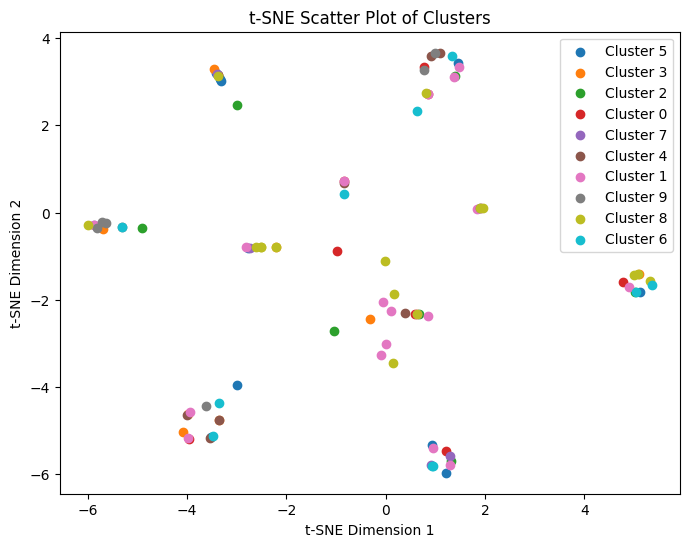

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Review'])

# Apply Latent Dirichlet Allocation (LDA)
num_topics = 10  # Adjust the number of topics as needed
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(X)

# Get topic distribution for each review
topic_distribution = lda_model.transform(X)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_representation = tsne.fit_transform(topic_distribution)

# Plot the scatter plot
plt.figure(figsize=(8, 6))
for cluster_id in df['cluster'].unique():
    plt.scatter(tsne_representation[df['cluster'] == cluster_id, 0], 
                tsne_representation[df['cluster'] == cluster_id, 1], 
                label=f'Cluster {cluster_id}')

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Scatter Plot of Clusters')
plt.legend()
plt.show()

In [350]:
import plotly.express as px

# Combine the dataframes
dfs = [tiger_df, gongcha_df, kungfu_df]

# Create a new dataframe to store the combined data
combined_df = pd.concat(dfs)

# Assuming combined_df is your combined dataframe containing reviews and ratings
combined_df['review_length'] = combined_df['Review'].apply(len)

# Create a scatter plot
fig = px.scatter(combined_df, x='Rating', y='review_length', 
                 title='Correlation between Ratings and Review Length',
                 labels={'rating': 'Rating', 'review_length': 'Review Length'}, 
                 color_discrete_sequence=primary_colors[:4])

# Show the plot
fig.show()

# Calculate the correlation coefficient
correlation = combined_df['rating'].corr(combined_df['review_length'])
print(f'Correlation coefficient between ratings and review length: {correlation}')


KeyError: 'rating'

In [357]:
fig = px.histogram(combined_df, x='review_length', y='Compound Sentiment Score', 
                   title='Review Length Distribution by Sentiment',
                   labels={'review_length': 'Review Length', 'sentiment': 'Sentiment'},
                   nbins=40,  # Adjust number of bins as needed
                   color_discrete_sequence=primary_colors,  # Use primary colors array
                   template=theme_hodp)
fig.show()

In [380]:
tiger_df.columns

Index(['Name', 'Post Time', 'Review', 'Rating', 'Sentiments',
       'Compound Sentiment Score', 'Sentiment Category', 'Converted Time',
       'Color', 'review_length'],
      dtype='object')

In [372]:
tiger_df['review_length'] = tiger_df['Review'].apply(len)
kungfu_df['review_length'] = kungfu_df['Review'].apply(len)
gongcha_df['review_length'] = gongcha_df['Review'].apply(len)

fig = px.histogram(tiger_df, x='review_length', y='Compound Sentiment Score', 
                   title='Review Length by Compound Sentiment Score',
                   labels={'review_length': 'Review Length', 'Compound Sentiment Score': 'Compound Sentiment Score'},
                   nbins=40,  # Adjust number of bins as needed
                   color_discrete_sequence=[primary_colors[0]],
                   name='Tiger Sugar', 
                   width=700) # Use primary color for df1


fig.add_trace(px.histogram(kungfu_df, x='review_length', y='Compound Sentiment Score', 
                            title='Review Length Distribution by Compound Sentiment Score (DF2)',
                            labels={'review_length': 'Review Length', 'Compound Sentiment Score': 'Compound Sentiment Score'},
                            nbins=40,  # Adjust number of bins as needed
                            name='Kung Fu Tea',
                            color_discrete_sequence=[primary_colors[1]]).data[0])

fig.add_trace(px.histogram(gongcha_df, x='review_length', y='Compound Sentiment Score', 
                            title='Review Length Distribution by Compound Sentiment Score (DF3)',
                            labels={'review_length': 'Review Length', 'Compound Sentiment Score': 'Compound Sentiment Score'},
                            nbins=40,  # Adjust number of bins as needed
                            name='Gong Cha',
                            color_discrete_sequence=[primary_colors[2]]).data[0])

# Update layout
fig.update_layout(template=theme_hodp, legend_title_text='Boba Shops')
# Show the plot
fig.show()

In [379]:
import plotly.graph_objects as go

# Create histograms for each boba shop
tiger_hist = go.Histogram(x=tiger_df['Compound Sentiment Score'], y=tiger_df['review_length'], 
                          name='Tiger Sugar', 
                          marker_color=primary_colors[0],  # Use primary color for df1
                          nbinsx=40)  # Adjust number of bins as needed

kungfu_hist = go.Histogram(x=kungfu_df['Compound Sentiment Score'], y=kungfu_df['review_length'], 
                            name='Kung Fu Tea', 
                            marker_color=primary_colors[1],  # Use primary color for df2
                            nbinsx=40)  # Adjust number of bins as needed

gongcha_hist = go.Histogram(x=gongcha_df['Compound Sentiment Score'], y=gongcha_df['review_length'], 
                            name='Gong Cha', 
                            marker_color=primary_colors[2],  # Use primary color for df3
                            nbinsx=40)  # Adjust number of bins as needed

# Create figure and add traces
fig = go.Figure(data=[tiger_hist, kungfu_hist, gongcha_hist])

# Update layout
fig.update_layout(title='Review Length Distribution by Compound Sentiment Score',
                  xaxis_title='Review Length',
                  yaxis_title='Compound Sentiment Score',
                  template=theme_hodp,
                  legend_title_text='Boba Shops')

# Show the plot
fig.show()
